In [208]:
import requests
import json
import pandas as pd
import seaborn as sbn
sbn.set()
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

['seaborn-dark',
 'seaborn-pastel',
 'fivethirtyeight',
 'seaborn-darkgrid',
 'ggplot',
 'classic',
 'seaborn-whitegrid',
 'seaborn-talk',
 'seaborn-paper',
 'bmh',
 'dark_background',
 'seaborn-bright',
 'seaborn-poster',
 'seaborn-notebook',
 'seaborn-muted',
 'grayscale',
 'seaborn-dark-palette',
 'seaborn-white',
 'seaborn-deep',
 'seaborn-ticks',
 'seaborn-colorblind']

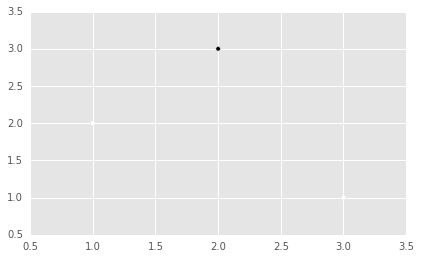

In [209]:
plt.scatter(x=[1,2,3],y=[2,3,1],c=[1,2,1])
plt.style.available

In [210]:
s = requests.Session()
resp = s.get("https://fantasy.premierleague.com/drf/bootstrap-static")


In [211]:
rawjson = resp.json()

In [212]:
rawjson

{'element_types': [{'id': 1,
   'plural_name': 'Goalkeepers',
   'plural_name_short': 'GKP',
   'singular_name': 'Goalkeeper',
   'singular_name_short': 'GKP'},
  {'id': 2,
   'plural_name': 'Defenders',
   'plural_name_short': 'DEF',
   'singular_name': 'Defender',
   'singular_name_short': 'DEF'},
  {'id': 3,
   'plural_name': 'Midfielders',
   'plural_name_short': 'MID',
   'singular_name': 'Midfielder',
   'singular_name_short': 'MID'},
  {'id': 4,
   'plural_name': 'Forwards',
   'plural_name_short': 'FWD',
   'singular_name': 'Forward',
   'singular_name_short': 'FWD'}],
 'elements': [{'assists': 0,
   'bonus': 0,
   'bps': 0,
   'chance_of_playing_next_round': None,
   'chance_of_playing_this_round': None,
   'clean_sheets': 0,
   'code': 48844,
   'cost_change_event': 0,
   'cost_change_event_fall': 0,
   'cost_change_start': 0,
   'cost_change_start_fall': 0,
   'creativity': '0.0',
   'dreamteam_count': 0,
   'ea_index': 56,
   'element_type': 1,
   'ep_next': '2.8',
   'ep_t

In [213]:
rawjson.keys()

dict_keys(['total-players', 'game-settings', 'phases', 'events', 'teams', 'element_types', 'elements'])

In [214]:
len(rawjson['elements'])


524

In [215]:
rawjson['teams'][0].keys()

dict_keys(['name', 'code', 'strength_attack_away', 'team_division', 'strength_defence_home', 'strength_attack_home', 'loss', 'short_name', 'points', 'strength_overall_home', 'current_event_fixture', 'next_event_fixture', 'position', 'unavailable', 'form', 'strength_overall_away', 'link_url', 'strength_defence_away', 'id', 'strength', 'draw', 'win', 'played'])

In [216]:
from pandas.io.json import json_normalize
df = json_normalize(rawjson['elements'])

In [217]:
df.columns


Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id',
       'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in',
       'loans_out', 'minutes', 'news', 'now_cost', 'own_goals',
       'penalties_missed', 'penalties_saved', 'photo', 'points_per_game',
       'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special',
       'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points',
       'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'yellow_cards'],
      dtype='object')

# What does it mean to maximize my team?

### Constraints

* Max of 100M total  (now_cost <= 1000 )
* 2 keeps
* 5 defenders
* 5 mids
* 3 forwards

Maybe maximize for players from Arsenal, Liverpool, and Everton

for mids and forwards maximize creativity and influence and goals_scored

for defenders maximize influence and clean sheets

First big problem:   Pick the initial team

Second Problem:  How to decide on the best trade for a week, wait a week and do 2 trades??

Other problems:  when to play bench boost etc.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11003d470>]], dtype=object)

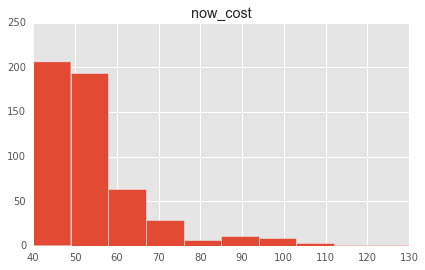

In [218]:
df.hist(column='now_cost')

In [265]:
df.creativity = pd.to_numeric(df.creativity)
df.threat = pd.to_numeric(df.threat)
df.influence = pd.to_numeric(df.influence)
df.ict_index = pd.to_numeric(df.ict_index)
df.form = pd.to_numeric(df.form)


In [232]:
df['creativecost'] = df.creativity.astype('float') / df.now_cost.astype('float') 
#df.now_cost.dtype
#df.creativity.fillna(0.0).dtype
#df.now_cost.astype('float')
#df.creativecost
df.head()

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,...,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards,creativecost,influencecost
0,0,0,0,NaN,NaN,0,48844,0,0,0,...,102,102,439,439,0.0,0.0,Ospina,0,0.0,0.000000
1,0,0,14,NaN,NaN,0,11334,0,0,0,...,6480,6480,15437,15437,0.2,0.2,Cech,0,0.0,0.429091
2,0,0,0,75.0,25.0,0,51507,0,0,0,...,854,854,10969,10969,0.0,0.0,Koscielny,0,0.0,0.000000
3,0,0,0,0.0,0.0,0,17127,0,0,0,...,100,100,723,723,0.0,0.0,Mertesacker,0,0.0,0.000000
4,0,0,0,0.0,0.0,0,158074,0,0,0,...,40,40,1335,1335,0.0,0.0,Gabriel,0,0.0,0.000000


In [220]:
df['influencecost'] = df.influence.astype('float') / df.now_cost.astype('float') 


In [221]:
import math
math.factorial(492) / (math.factorial(15)*math.factorial(492-15))

1.4769573976520696e+28

In [257]:
zz = df[['web_name','creativity','influence']].head().iterrows()
for r in zz:
    print(r[1].web_name)

Ospina
Cech
Koscielny
Mertesacker
Gabriel


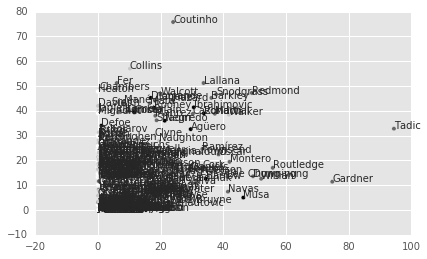

In [258]:
fig, ax = plt.subplots()

ax.scatter(x=df.creativity,y=df.influence, c=df.element_type)

#ax.scatter(x='creativity', y='influence', ax=ax)

for row in df[['web_name','creativity','influence']].iterrows():
    ax.annotate(row[1].web_name, xy=(row[1].creativity,row[1].influence))

#df.plot.scatter(x='influencecost',y='creativecost',c='element_type')
#df.plot.scatter(x='creativity',y='influence')

In [ ]:
from bokeh.charts import Scatter, output_file, show
from bokeh.io import output_notebook

In [ ]:
output_notebook()

In [236]:
p = Scatter(df, x='influencecost', y='creativecost', color='element_type')#, title="HP vs MPG (shaded by CYL)",
#            xlabel="Miles Per Gallon", ylabel="Horsepower")

#output_file("scatter.html")

show(p)

In [269]:
df['threatcost'] = df.threat.astype('float') / df.now_cost.astype('float') 
df['myscore'] = (df.threat+df.influence+df.creativity)*df.form+df.total_points


In [270]:
df.sort(columns=['element_type','myscore'],ascending=False)[['element_type','first_name','web_name','now_cost','myscore','creativecost','influencecost','threat']]

/Users/bmiller/.virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,element_type,first_name,web_name,now_cost,myscore,creativecost,influencecost,threat
448,4,Salomón,Rondón,65,1302.4,0.520000,0.600000,89.0
238,4,Sergio,Agüero,130,1297.8,0.227692,0.250769,81.0
268,4,Wayne,Rooney,90,973.7,0.198889,0.457778,79.0
163,4,Adama,Diomande,45,864.0,0.373333,1.004444,45.0
477,4,Álvaro,Negredo,65,839.7,0.327692,0.553846,35.0
271,4,Zlatan,Ibrahimovic,115,801.0,0.266087,0.360000,16.0
354,4,Jermain,Defoe,70,560.8,0.015714,0.485714,34.0
499,4,Fernando,Llorente,65,487.5,0.133846,0.150769,78.0
96,4,Diego,Costa,95,485.0,0.122105,0.414737,45.0
468,4,Enner,Valencia,55,295.5,0.038182,0.054545,53.0


In [ ]:
rawjson['element_types']

In [278]:
df[df.element_type == 3].sort(columns=['element_type','myscore'],ascending=False)[['element_type','first_name','web_name','now_cost','myscore','creativecost','influencecost','threat']]
df.iloc[0].second_name

/Users/bmiller/.virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


'Ospina'

,web_name,element_type
0,Ospina,1
1,Cech,1
2,Koscielny,2
3,Mertesacker,2
4,Gabriel,2
5,Bellerín,2
6,Gibbs,2
11,Sánchez,3
12,Walcott,3
13,Özil,3


In [281]:
def makeTeam(teamFrame):
    totalCost = 0
    players = []
    for pos,nump in [(3,5),(4,3),(2,5),(1,2)]:
        currPos = df[df.element_type == pos].sort(columns=['element_type','myscore'],ascending=False)
        for p in range(nump):
            players.append("{} {} {} {}".format(currPos.iloc[p].first_name,
                                             currPos.iloc[p].second_name, 
                                                currPos.iloc[p].element_type,
                                               currPos.iloc[p].now_cost))
            totalCost += currPos.iloc[p].now_cost
            print(players, totalCost)
    return players

myTeam = makeTeam(df) 
import pprint

pprint.pprint(myTeam)
        
        

['Philippe Coutinho 3 80'] 80
['Philippe Coutinho 3 80', 'Nathan Redmond 3 60'] 140
['Philippe Coutinho 3 80', 'Nathan Redmond 3 60', 'Adam Lallana 3 70'] 210
['Philippe Coutinho 3 80', 'Nathan Redmond 3 60', 'Adam Lallana 3 70', 'Robert Snodgrass 3 55'] 265
['Philippe Coutinho 3 80', 'Nathan Redmond 3 60', 'Adam Lallana 3 70', 'Robert Snodgrass 3 55', 'Ross Barkley 3 75'] 340
['Philippe Coutinho 3 80', 'Nathan Redmond 3 60', 'Adam Lallana 3 70', 'Robert Snodgrass 3 55', 'Ross Barkley 3 75', 'Salomón Rondón 4 65'] 405
['Philippe Coutinho 3 80', 'Nathan Redmond 3 60', 'Adam Lallana 3 70', 'Robert Snodgrass 3 55', 'Ross Barkley 3 75', 'Salomón Rondón 4 65', 'Sergio Agüero 4 130'] 535
['Philippe Coutinho 3 80', 'Nathan Redmond 3 60', 'Adam Lallana 3 70', 'Robert Snodgrass 3 55', 'Ross Barkley 3 75', 'Salomón Rondón 4 65', 'Sergio Agüero 4 130', 'Wayne Rooney 4 90'] 625
['Philippe Coutinho 3 80', 'Nathan Redmond 3 60', 'Adam Lallana 3 70', 'Robert Snodgrass 3 55', 'Ross Barkley 3 75', 'Sal

/Users/bmiller/.virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [264]:
df.to_csv('week2.csv',header=True)
#df.to_excel('week1.xlsx')

In [ ]:
df['position'] = df.element_type.map(lambda x : str({1:'Keep',2:'Def',3:'Mid',4:'Fwd'}[x]))

In [284]:
sum([165.38, 95.07, 65.05, 99.74, 17.27, 239.61, 75.11, 48.33, 39.31, 376.05])/10


122.09200000000001

In [ ]:
from altair import Chart


In [ ]:
Chart(df).mark_point().encode(
    x='influence',
    y='threat',
    color='element_type:N',
    shape='element_type'
)

In [ ]:
from altair import tutorial
tutorial()